# O teste swap

O teste swap pode ser utilizado para medir a fidelidade entre dois estados quânticos desconhecidos $|\psi\rangle$ e $|\phi\rangle$ de um qudit estimando-se as probabilidades para medidas em um qubit auxiliar.

Consideremos um qubit preparado no estado padrão, e dois sistemas de $n$ qubits, um preparado no estado $|\psi\rangle$ e outro no estado $|\phi\rangle$. Consideremos também a porta SWAP para qudits. Sabemos que a porta 
$$SWAP = C_X^{j\rightarrow k}C_X^{k\rightarrow j}C_X^{j\rightarrow k}$$
troca dos estados de dois qubits. Vamos assumir a existência de uma SWAP que faz isso para qudits. Depois podemos voltar e verificar isso. Dito isto, consideremos as seguintes etapas:
* Prepara o qubit e os 2 qudits no estado
$$|\Psi_0\rangle = |0\rangle|\psi\rangle|\phi\rangle.$$
* Aplica uma porta Hadamard no qubit:
\begin{align}
|\Psi_1\rangle & = (H\otimes\mathbb{I}\otimes\mathbb{I})|\Psi_0\rangle \\
& = (H|0\rangle)|\psi\rangle|\phi\rangle) \\
& = |+\rangle|\psi\rangle|\phi\rangle.
\end{align}

<img src='fig_swap_test.png' width='400'>

* Aplica uma __SWAP controlada__ com o qubit como controle e os qudits como target:
\begin{align}
|\Psi_2\rangle & = C_{SWAP}|\Psi_1\rangle \\
& = 2^{-1/2}C_{SWAP}(|0\rangle+|1\rangle)|\psi\rangle|\phi\rangle \\
& = 2^{-1/2}\big(|0\rangle|\psi\rangle|\phi\rangle + |1\rangle C_{SWAP}(|\psi\rangle|\phi\rangle)\big) \\
& = 2^{-1/2}\big(|0\rangle|\psi\rangle|\phi\rangle + |1\rangle|\phi\rangle|\psi\rangle\big).
\end{align}
* Aplica a Hadamard no qubit:
\begin{align}
|\Psi_3\rangle & = 2^{-1/2}\big(|+\rangle|\psi\rangle|\phi\rangle + |-\rangle|\phi\rangle|\psi\rangle\big).
\end{align}

* Toma o traço sobre os qudits
\begin{align}
\rho_{qb} & = Tr_{qds}\big(|\Psi_3\rangle\langle\Psi_3|\big) \\
& = 2^{-1}Tr_{qds}\big(\big(|+\rangle|\psi\rangle|\phi\rangle + |-\rangle|\phi\rangle|\psi\rangle\big)\big(\langle+|\langle\psi|\langle\phi| + \langle-|\langle\phi|\langle\psi|\big)\big) \\
& = 2^{-1}Tr_{qds}\big(|+\rangle|\psi\rangle|\phi\rangle\langle +|\langle\psi|\langle\phi| + |+\rangle|\psi\rangle|\phi\rangle\langle-|\langle\phi|\langle\psi| + |-\rangle|\phi\rangle|\psi\rangle\langle +|\langle\psi|\langle\phi| + |-\rangle|\phi\rangle|\psi\rangle\langle-|\langle\phi|\langle\psi|\big) \\
& = 2^{-1}\big(|+\rangle\langle +|\ ||\psi||^2||\phi||^2 + |+\rangle\langle-|\ |\langle\phi|\psi\rangle|^2 + |-\rangle\langle +|\ |\langle\psi|\phi\rangle|^2 + |-\rangle\langle-|\ ||\phi||^2||\psi||^2\big) \\
& = 2^{-2}\big(\big(|0\rangle\langle 0|+|0\rangle\langle 1|+|1\rangle\langle 0|+|1\rangle\langle 1|\big) \\
& \hspace{1cm} + \big(|0\rangle\langle 0|-|0\rangle\langle 1|+|1\rangle\langle 0|-|1\rangle\langle 1|\big) |\langle\phi|\psi\rangle|^2 \\
& \hspace{1cm} + \big(|0\rangle\langle 0|+|0\rangle\langle 1|-|1\rangle\langle 0|-|1\rangle\langle 1|\big) |\langle\psi|\phi\rangle|^2 \\
& \hspace{1cm} + \big(|0\rangle\langle 0|-|0\rangle\langle 1|-|1\rangle\langle 0|+|1\rangle\langle 1|\big)\big) \\
& = 2^{-1}\big(|0\rangle\langle 0|\big(1+|\langle\phi|\psi\rangle|^2\big) + |1\rangle\langle 1|\big(1-|\langle\phi|\psi\rangle|^2\big) \big)
\end{align}
em que usamos 
$$||\psi||^2=||\phi||^2=1.$$

Temos assim as probabilidades:
\begin{align}
& Pr(0|\Psi_3) = 2^{-1}\big(1+|\langle\phi|\psi\rangle|^2\big), \\
& Pr(1|\Psi_3) = 2^{-1}\big(1-|\langle\phi|\psi\rangle|^2\big).
\end{align}

Teremos assim que a fidelidade entre os 2 estados de qudits pode ser estimanda por
\begin{align}
F(|\psi\rangle,|\phi\rangle) & = |\langle\phi|\psi\rangle|^2 \\
& = Pr(0|\Psi_3) - Pr(1|\Psi_3) \\
& = 2Pr(0|\Psi_3)-1 \\
& = 1 - 2Pr(1|\Psi_3).
\end{align}

Vamos considerar como exemplo
\begin{align}
& |\psi\rangle = |0\rangle, \\
& |\phi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle.
\end{align}
Assim, teoricamente temos que
$$F(|\psi\rangle,|\phi\rangle)=\cos^2(\theta/2).$$

In [35]:
from qiskit import *
import numpy as np
import math
import qiskit
nshots = 8192
IBMQ.load_account()
#provider= qiskit.IBMQ.get_provider(hub='ibm-q-research-2',group='federal-uni-sant-1',project='main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

ibmqfactory.load_account:WARNING:2023-02-11 09:10:42,286: Credentials are already in use. The existing account in the session will be replaced.


63e785cb5ddc10d87e304840
Job Status: job has successfully run
63e7868d3c90801d698f0de5
Job Status: job has successfully run
63e78771c0aeb05da73e92ab
Job Status: job has successfully run
63e788073c908063ed8f0df0
Job Status: job has successfully run
63e7884e009ce47c336f9caa
Job Status: job has successfully run
63e7888b5ddc105eaa304853
Job Status: job has successfully run
63e788c6ce494c32dfb83b5e
Job Status: job has successfully run
63e789a26fb5c065d4d7f226
Job Status: job has successfully run
63e78a2d5ddc108218304862
Job Status: job has successfully run
63e78b091e8effd74f26f928
Job Status: job has successfully run
63e78be55a24fc2ba1f347ff
Job Status: job has successfully run


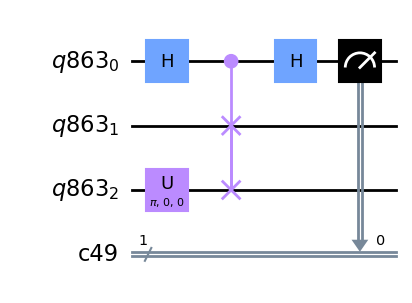

In [36]:
dth = math.pi/10
th = np.arange(0,math.pi+dth,dth)
ph = 0; lb = 0
N = len(th)
F_the = np.zeros(N); F_sim = np.zeros(N); F_exp = np.zeros(N)
for j in range(0,N):
    F_the[j] = math.cos(th[j]/2)**2
    qr = QuantumRegister(3)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr,cr)
    qc.u(th[j],ph,lb,qr[2])
    qc.h(qr[0])
    qc.cswap(qr[0],qr[1],qr[2])
    qc.h(qr[0])
    qc.measure(qr[0],cr[0])
    job_sim = execute(qc, backend=simulator, shots=nshots)
    counts = job_sim.result().get_counts(qc)
    if '0' in counts:
        F_sim[j] = 2*counts['0']/nshots - 1
    job_exp = execute(qc, backend=device, shots=nshots)
    print(job_exp.job_id())
    job_monitor(job_exp)
    counts = job_exp.result().get_counts(qc)
    if '0' in counts:
        F_exp[j] = 2*counts['0']/nshots - 1
qc.draw('mpl')

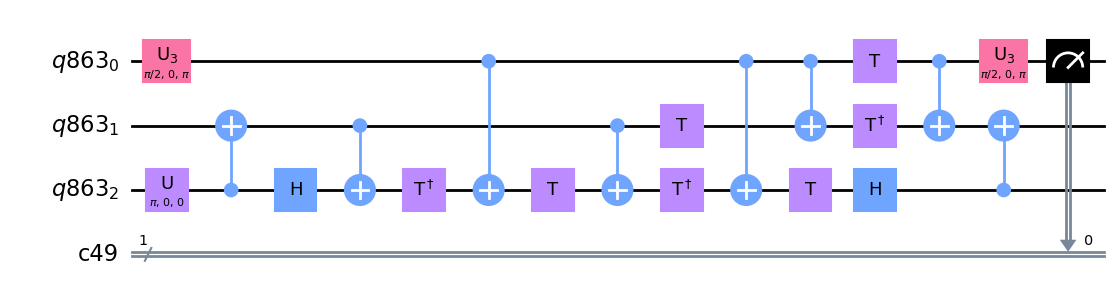

In [40]:
qc.decompose().decompose().draw('mpl') # o circuito é "profundo" por causa da swap controlada

In [37]:
F_the, F_sim, F_exp

(array([1.00000000e+00, 9.75528258e-01, 9.04508497e-01, 7.93892626e-01,
        6.54508497e-01, 5.00000000e-01, 3.45491503e-01, 2.06107374e-01,
        9.54915028e-02, 2.44717419e-02, 3.74939946e-33]),
 array([ 1.        ,  0.97924805,  0.90625   ,  0.78393555,  0.65771484,
         0.50146484,  0.35375977,  0.19165039,  0.09277344,  0.03100586,
        -0.00512695]),
 array([0.81103516, 0.67822266, 0.63916016, 0.60009766, 0.36425781,
        0.35229492, 0.17797852, 0.1730957 , 0.08325195, 0.01586914,
        0.07373047]))

In [25]:
from matplotlib import pyplot as plt

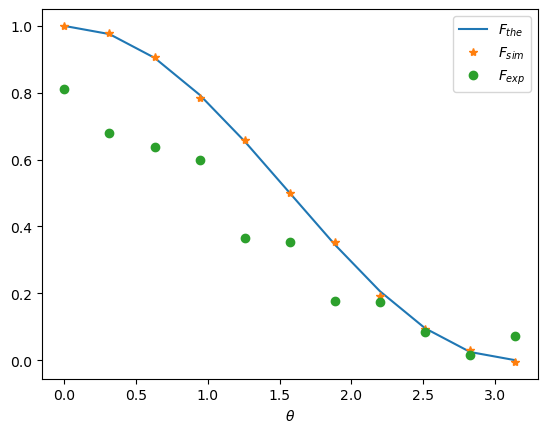

In [38]:
plt.plot(th, F_the, label=r'$F_{the}$')
plt.plot(th, F_sim, '*', label=r'$F_{sim}$')
plt.plot(th, F_exp, 'o', label=r'$F_{exp}$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()

## Porta swap para __qudits__

Se a dimensão dos qudits é 
$$d=2^n$$
com $n$ inteiro positivo, é fácil extender a SWAP através da __composição de SWAPs de 2 qubits__. Com isso, no final, teremos a troca dos estados dos qudits.

No entando, quando
$$d\ne 2^n$$
teremos que apelar para a __álgebra de qudits__ para obter a troca de estados.

Como para estados de dois qubits a porta SWAP é obtida através da CNOT, vamos verificar se esse também é o caso para qudits. Neste caso, a porta __CNOT generalizada__ é dada por
\begin{equation}
C_{x}^{A\rightarrow B} = \sum_{j=0}^{d-1}|j\rangle\langle j|\otimes X(j),
\end{equation}
com o _operador de deslocamento de estado_ definido por
\begin{equation}
X(j)|k\rangle = |j\oplus k\rangle \equiv |(j+k)\mod(d)\rangle.
\end{equation}

A porta de troca de estados seria então e.g.
\begin{align}
SWAP & = C_{x}^{A\rightarrow B}C_{x}^{B\rightarrow A}C_{x}^{A\rightarrow B} \\
& = \sum_{j=0}^{d-1}|j\rangle\langle j|\otimes X(j)\sum_{k=0}^{d-1}X(k)\otimes|k\rangle\langle k|\sum_{l=0}^{d-1}|l\rangle\langle l|\otimes X(l) \\
& = \sum_{j,k,l=0}^{d-1}|j\rangle\langle j|X(k)|l\rangle\langle l|\otimes X(j)|k\rangle\langle k|X(l) \\
& = \sum_{j,k,l=0}^{d-1}|j\rangle\langle j|k\oplus l\rangle\langle l|\otimes |j\oplus k\rangle\langle l\oplus k| \\
& = \sum_{j,k,l=0}^{d-1}|j\rangle\delta_{j,k\oplus l}\langle l|\otimes |j\oplus k\rangle\langle l\oplus k| \\
& = \sum_{k,l=0}^{d-1}|k\oplus l\rangle\langle l|\otimes |k\oplus l\oplus k\rangle\langle l\oplus k| \\
& = \sum_{k,l=0}^{d-1}|k\oplus l\rangle\langle l|\otimes |l\rangle\langle l\oplus k|,
\end{align}
em que usamos
$$k\oplus l\oplus k =l. ????$$

Com isso, usando os estados
\begin{align}
& |\psi\rangle = \sum_{p=0}^{d-1}\psi_p|p\rangle, \\
& |\phi\rangle = \sum_{q=0}^{d-1}\phi_q|q\rangle,
\end{align}
teremos que
\begin{align}
& SWAP(|\psi\rangle\otimes|\phi\rangle) \\
& = SWAP \big(\sum_{p=0}^{d-1}\psi_p|p\rangle\otimes\sum_{q=0}^{d-1}\psi_q|q\rangle\big) \\
& = \sum_{p,q=0}^{d-1}\psi_p\phi_q SWAP(|p\rangle\otimes|q\rangle) \\
& = \sum_{p,q=0}^{d-1}\psi_p\phi_q\sum_{k,l=0}^{d-1}(|k\oplus l\rangle\langle l|\otimes|l\rangle\langle l\oplus k|)(|p\rangle\otimes|q\rangle) \\
& = \sum_{p,q,k,l=0}^{d-1}\psi_p\phi_q(|k\oplus l\rangle\langle l|p\rangle\otimes|l\rangle\langle l\oplus k|q\rangle) \\
& = \sum_{p,q,k,l=0}^{d-1}\psi_p\phi_q(|k\oplus l\rangle\delta_{l,p}\otimes|l\rangle\delta_{l\oplus k,q}) \\
& = \sum_{k,l=0}^{d-1}\psi_l\phi_{l\oplus k}(|k\oplus l\rangle\otimes|l\rangle) \\
& = \sum_{l=0}^{d-1}\Big(\sum_{k=0}^{d-1}\phi_{l\oplus k}|k\oplus l\rangle\Big)\otimes \psi_l|l\rangle \\
& = \sum_{l=0}^{d-1}|\phi\rangle\otimes \psi_l|l\rangle \\
& = |\phi\rangle\otimes \sum_{l=0}^{d-1}\psi_l|l\rangle \\
& = |\phi\rangle\otimes|\psi\rangle,
\end{align}
como queríamos verificar.

## Exercícios
1. Implemente o teste SWAP para estimar a fidelidade entre dois bons exemplos de estados de 2 qubits.

1. Escreva um algoritmo para estimar a fidelidade entre dois estados mistos $\rho$ e $\sigma$.

1. Verifique que a porta SWAP para 2 qubits pode ser escrita como $SWAP=\sum_{k,l=0}^{1}|k\oplus l\rangle\langle l|\otimes |l\rangle\langle l\oplus k|$.

## Implementação com qubits da porta SWAP para $d\ne 2^n$

## Outras medidas de "distância"
Estimativa de outras medidas de distância em computadores quânticos

# Teste swap para estados mistos

O teste swap pode ser utilizado para estimar a sobreposição $|\langle\psi|\phi'\rangle|$ entre 2 estados puros quaisquer. Ademais, do teorema de Uhlmann temos que a fidelidade entre dois estados mistos pode ser escrita em termos da fidelidade de suas purificações como
$$F(\rho,\sigma) = \max_{|\phi'\rangle}F(|\psi\rangle,|\phi'\rangle),$$
em que
$$|\psi\rangle = \sum_j \sqrt{r_j}|r_j\rangle\otimes|j\rangle$$
é uma purificação fixa de
$$\rho = \sum_j r_j |r_j\rangle\langle r_j|.$$
A maximização é feita sobre as purificações
\begin{align}
|\phi'\rangle & = \sum_j \sqrt{s_j}|s_j\rangle\otimes|b_j\rangle \\
& = \sum_j \sqrt{s_j}|s_j\rangle\otimes U|j\rangle \\
& = (I\otimes U)\sum_j \sqrt{s_j}|s_j\rangle\otimes|j\rangle \\
& = (I\otimes U)|\phi\rangle,
\end{align}

onde definimos a purificação fixa
$$|\phi\rangle = \sum_j \sqrt{s_j}|s_j\rangle\otimes|j\rangle$$
do estado
$$\sigma = \sum_j s_j|s_j\rangle\langle s_j|.$$


Podemos escrever assim
$$F(\rho,\sigma) = \max_{U}F(|\psi\rangle,(I\otimes U)|\phi\rangle).$$

O algoritmo para uso do test swap para estimar a fidelidade entre estados mistos está ilustrado na figura abaixo.

<img src='fig_swap_test_rho.png' width='400'>

* Começamos com $\rho$ e $\sigma$ e calculamos suas respectivas purificações $|\psi\rangle$ e $|\phi\rangle$. Feito isso, usamos um algoritmo (determinístico ou variacional) para preparação de estados quânticos (sugiro usar o do qiskit).  

* O próximo passo é aplicar a transformação unitária $U$, que generaliza a purificação de $\sigma$. A optimização de $U$ pode ser feita de forma simplória (varrendo os valores dos parâmetros que determinam $U$), ou aplicando ferramentas mais modernas, em particular o algoritmo variacional quântico (sugiro ir por esse caminho).

* Como vimos acima, temos que as probabilidades das medidas do 1º qubit são tais que
\begin{align}
& p_0 -p_1 = 2p_0 -1 = 1-2p_1 \\
& = |\langle\psi|\phi'\rangle|^2 = |\langle\psi|(I\otimes U)\phi\rangle|^2 \\
& =: |\langle\psi|\phi_U\rangle|^2.
\end{align}
Teremos assim que
\begin{align}
F(\rho,\sigma) & = \max_{U}|\langle\psi|\phi_U\rangle| \\
& = \max_{p_0}\sqrt{2p_0-1} \\
& = \min_{p_1}\sqrt{1-2p_1}.
\end{align}

Sugiro aplicar primeiramente para estados de um qubit.

## Estimativa da "discórdia quântica" via o teste swap

Vamos considerar inicialmente que $\rho$ é um estado qualquer de 2 qubits.

### Referências

1. L. Cincio, Y. Subaşı, A. T. Sornborger, and P. J. Coles, “Learning the quantum algorithm for state overlap,” New J. Phys., vol. 20, no. 11, p. 113022, Nov. 2018, doi: 10.1088/1367-2630/aae94a.
